In [12]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import pickle
from plotly.subplots import make_subplots


In [3]:
neg_c ='#EB7C60'
neg_c_dark ='#E65A37'
pos_c = '#84EBE1'
pos_c_dark = '#3EE0CF'
green = '#39ec81'
turq = '#068789'
offwhite = '#F3F3F3'

In [4]:
df = pd.read_pickle('../data_processing/data/KS_data.pkl')

In [5]:
df.shape

(172741, 13)

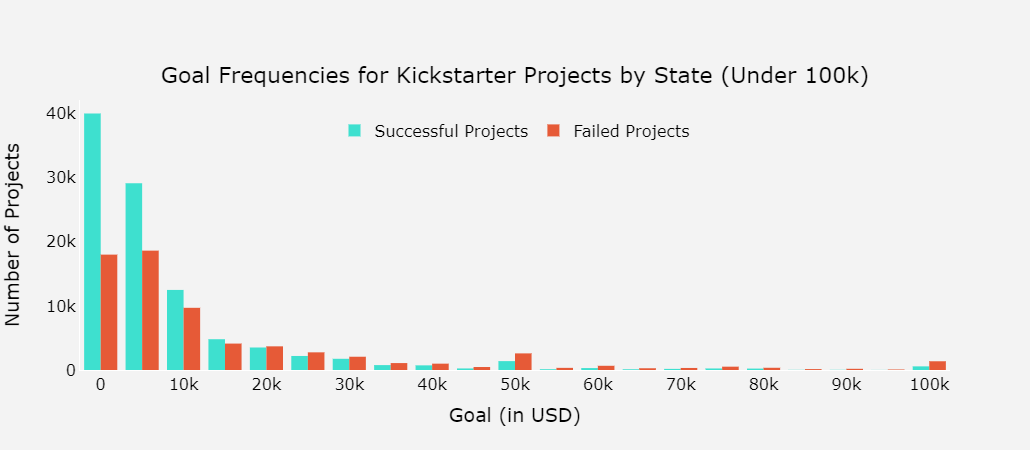

In [21]:
fig = go.Figure()

fig.add_trace(go.Histogram(
    x=df.goal[df.goal <= 100000][df.state == 1],
    name = "Successful Projects",
    marker = dict(color = pos_c_dark),
    nbinsx = 40))

fig.add_trace(go.Histogram(
    x=df.goal[df.goal <= 100000][df.state == 0], 
    name = "Failed Projects",
    marker = dict(color = neg_c_dark),
    nbinsx = 40))

fig.update_layout(
    title = dict(
        text = "Goal Frequencies for Kickstarter Projects by State (Under 100k)", 
        xanchor = "center", 
        x = .5, 
        y = .85),
    plot_bgcolor = offwhite,
    paper_bgcolor = offwhite,
    legend = dict(yanchor="top", y=.95, xanchor="center", x = .5, orientation = 'h'),
    font = dict(size = 16, color = 'black'),
#     width = 1500,
#     height = 800
)

fig.update_yaxes(
    title = dict(text = "Number of Projects"), 
    showgrid = False,
    zeroline = False)
fig.update_xaxes(
    title = dict(text = "Goal (in USD)"),    
    showgrid = False,
    zeroline = False,
    tick0 = False,
    dtick = 10000
)


pickle.dump(fig, open('KS_Goal_Freq.pkl', 'wb'))

fig.show()

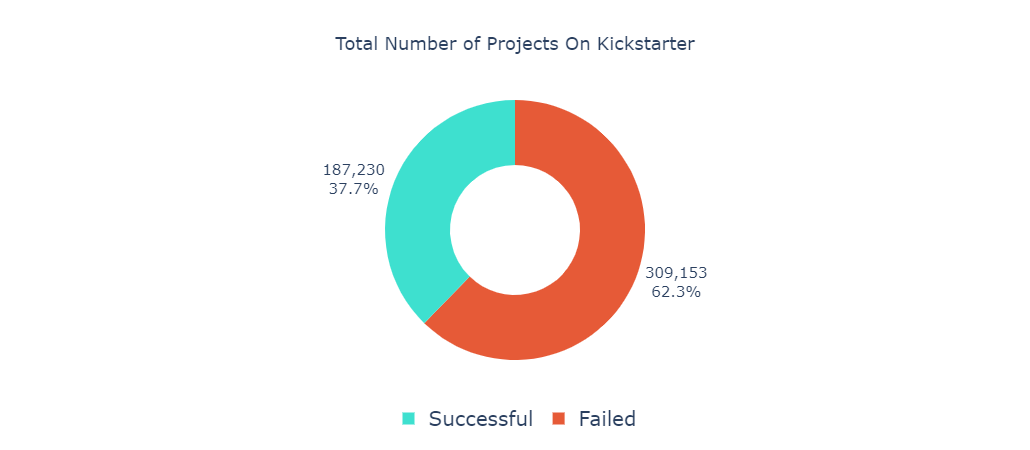

In [30]:
successful_proj = 187230
total_proj = 496383
failed_proj = abs(successful_proj - total_proj) #August 31st]

labels = ['Successful', 'Failed']
values = [successful_proj, failed_proj]

fig = go.Figure(data =go.Pie(
    labels = labels, 
    values = values, 
    textinfo = 'percent+value', 
    textposition = 'outside',
    hole = .5))

fig.update_layout(
    title = dict(text = "Total Number of Projects On Kickstarter", font = dict(size = 18), xanchor = "center", x = .5),
    legend = dict(
        yanchor="bottom",
        y=-0.30,
        xanchor="center",
        x=0.50,
        orientation = 'h',
        traceorder = 'reversed', 
        font = dict(size = 20)),
    autosize=False,
    font = dict(size = 15),
    width=450,
    height=450)

fig.update_traces(
    marker = dict(
        colors = [pos_c_dark, neg_c_dark]
    ))

fig.show()
fig.write_image("Viz/KS_Tot_Proj.png")

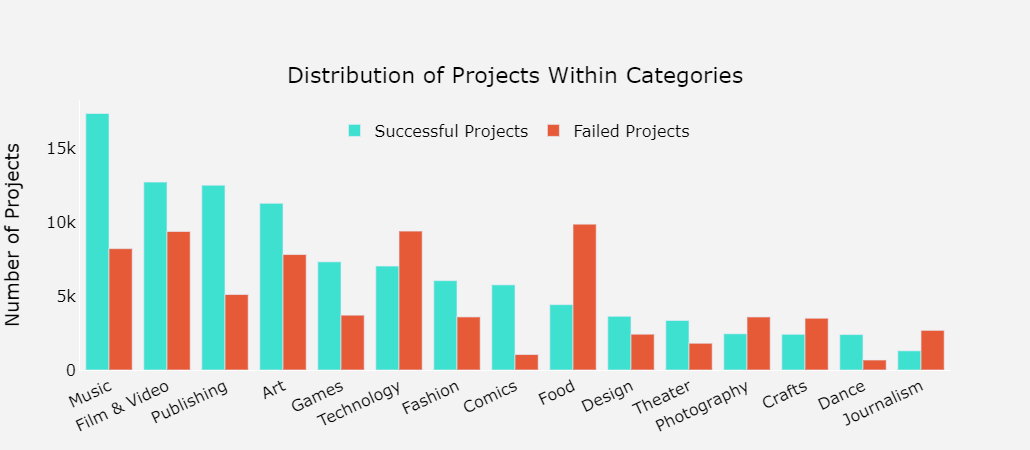

In [24]:
bar_success_categories = df[df.state == 1].category_parent_name.value_counts()
bar_failed_categories = df[df.state == 0].category_parent_name.value_counts()

barfig = go.Figure()

barfig.add_trace(go.Bar(
    x = bar_success_categories.index, 
    y = bar_success_categories,
    name = 'Successful Projects',
    marker = dict(color = pos_c_dark)
))

barfig.add_trace(go.Bar(
    x = bar_failed_categories.index, 
    y = bar_failed_categories,
    name = 'Failed Projects',
    marker = dict(color = neg_c_dark)
))

barfig.update_layout(
    title = dict(
        text = "Distribution of Projects Within Categories", 
        xanchor = "center", 
        x = .5, 
        y = .85),
    plot_bgcolor = offwhite,
    paper_bgcolor = offwhite,
    legend = dict(yanchor="top", y=.95, xanchor="center", x = .5, orientation = 'h'),
    font = dict(size = 16, color = 'black'),
#     width = 1500,
#     height = 800
)

barfig.update_yaxes(
    title = dict(text = "Number of Projects"), 
    showgrid = False,
    zeroline = False)
barfig.update_xaxes(
#     title = dict(text = "Goal (in USD)"),    
    showgrid = False,
    zeroline = False
)

barfig.update_xaxes(tickangle=-25)
barfig.update_yaxes(title = dict(text = "Number of Projects"))
barfig.show()
# barfig.write_image("Viz/Category_Distribution.png")
pickle.dump(barfig, open('Category_Distribution.pkl', 'wb'))


In [73]:
df.state.value_counts()

1    99953
0    72787
Name: state, dtype: int64

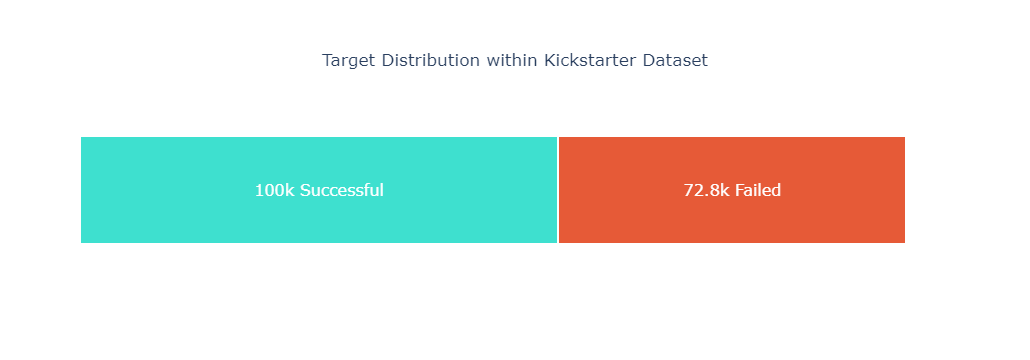

In [71]:
linewidth = 2.3
linecolor = 'white'
pos = [99953]
neg = [72787]

results_fig = go.Figure()

results_fig.add_trace(go.Bar(
    y = [0],
    x = pos,
    name = "Successful Projects",
    texttemplate = '%{x:.3s} Successful',
    textposition = 'inside',
    insidetextanchor  = "middle",
    textfont = dict(color = 'white', size = 16),
    orientation = 'h',
    marker = dict(color = pos_c_dark,line = dict(color = linecolor, width = linewidth))
))

results_fig.add_trace(go.Bar(
    y = [0],
    x = neg,
    name = "Failed Projects",
    texttemplate = '%{x:.3s} Failed',
    textposition = 'inside',
    insidetextanchor  = "middle",
    textfont = dict(color = 'white', size = 16),
    orientation = 'h',
    marker = dict(color = neg_c_dark, line = dict(color = linecolor, width = linewidth))
))

results_fig.update_layout(
    title = dict(text = "Target Distribution within Kickstarter Dataset", 
        xanchor = "center", 
        x = .5, 
        y = .85),
    xaxis = dict(showgrid = False, showline = False, showticklabels = False, zeroline = False),
    yaxis = dict(showgrid = False, showline = False, zeroline = False, showticklabels = False),
    
    barmode = 'stack',
    bargap = .4,
    showlegend = False,
    legend = dict(orientation = 'h', traceorder = 'normal'),
    plot_bgcolor = 'white',
    paper_bgcolor = 'white',
    height = 300, 
    width = 1000,
#     margin=dict(t=20, b=40)
    
)
pickle.dump(results_fig, open('Data_dist.pkl', 'wb'))

results_fig.show()

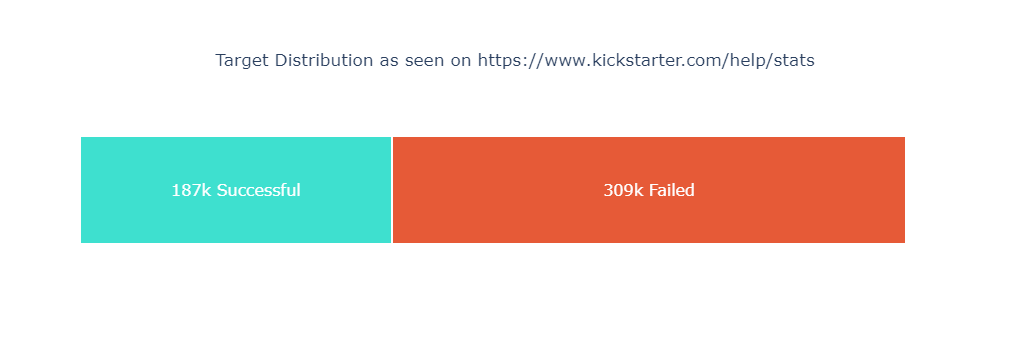

In [73]:
linewidth = 2.3
linecolor = 'white'


successful_proj = 187230
total_proj = 496383
unsuccessful_proj = total_proj - successful_proj

pos = [successful_proj]
neg = [unsuccessful_proj]


ks_fig = go.Figure()

ks_fig.add_trace(go.Bar(
    y = [0],
    x = pos,
    name = "Successful Projects",
    texttemplate = '%{x:.3s} Successful',
    textposition = 'inside',
    insidetextanchor  = "middle",
    textfont = dict(color = 'white', size = 16),
    orientation = 'h',
    marker = dict(color = pos_c_dark,line = dict(color = linecolor, width = linewidth))
))

ks_fig.add_trace(go.Bar(
    y = [0],
    x = neg,
    name = "Failed Projects",
    texttemplate = '%{x:.3s} Failed',
    textposition = 'inside',
    insidetextanchor  = "middle",
    textfont = dict(color = 'white', size = 16),
    orientation = 'h',
    marker = dict(color = neg_c_dark, line = dict(color = linecolor, width = linewidth))
))

ks_fig.update_layout(
    title = dict(text = "Target Distribution as seen on https://www.kickstarter.com/help/stats", 
        xanchor = "center", 
        x = .5, 
        y = .85),
    xaxis = dict(showgrid = False, showline = False, showticklabels = False, zeroline = False),
    yaxis = dict(showgrid = False, showline = False, zeroline = False, showticklabels = False),
    
    barmode = 'stack',
    bargap = .4,
    showlegend = False,
    legend = dict(orientation = 'h', traceorder = 'normal'),
    plot_bgcolor = 'white',
    paper_bgcolor = 'white',
    height = 300, 
    width = 1000,
#     margin=dict(t=20, b=40)
    
#     margin=dict(l=0, r=0, t=0, b=0)
    
)
pickle.dump(ks_fig, open('KS_WBData.pkl', 'wb'))

ks_fig.show()

In [15]:
accuracy_label = ['72.15%', '60.43%', '72.35%', '72.53%']
accuracy = [.7215, .6043, .7235, .7253, .74] 
model_compare = go.Figure()

model_compare.add_trace(go.Scatter(
    x = (1,1,1,1, 1),
    y=accuracy, 
    text = accuracy,
    mode='markers', 
    marker = dict(color = turq)))

model_compare.update_traces(textposition='middle right')

model_compare.update_layout(
    title = dict(text = 'Accuracy of Models', xanchor = "center", x = .5),
    plot_bgcolor = 'white',
    paper_bgcolor = 'white',
    legend = dict(yanchor="top", y=.90, xanchor="center", x = .5, orientation = 'h', font = dict(size = 30)),
    font = dict(size = 20, color = 'black'),
    width = 400,
    height = 800,
    yaxis=dict(tickformat=".0%")
)

model_compare.update_yaxes(
    showgrid = False,
    zeroline = False,
    side = 'right'
)

model_compare.update_xaxes(
#     title = dict(text = "Goal (in USD)"),    
    showgrid = False,
    zeroline = False,
    showticklabels=False
)

model_compare.add_annotation(
            x=1,
            y=accuracy[0],
            text=accuracy_label[0],
            ax=-140.43,
            ay= 40,
            arrowcolor = turq,
            arrowwidth = 2)

model_compare.add_annotation(
            x=1,
            y=accuracy[1],
            text=accuracy_label[1],
            ax=-140.43,
            ay= 0,
            arrowcolor = turq,
            arrowwidth = 2)

model_compare.add_annotation(
            x=1,
            y=accuracy[2],
            text=accuracy_label[2],
            ax=-140.43,
            ay= 0,
            arrowcolor = turq,
            arrowwidth = 2)

model_compare.add_annotation(
            x=1,
            y=accuracy[3],
            text=accuracy_label[3],
            ax=-140.43,
            ay=-40,
            arrowcolor = turq,
            arrowwidth = 2)

model_compare.write_image("Viz/Model_Accuracy.png")
model_compare.show()